In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
#Task1
#data_matrix1 to keep features data with respect to label 1
#data_matrix2 to keep features data with respect to label 2
matrix = np.loadtxt('data.txt',usecols=range(0,11),skiprows=1)
data_matrix = np.delete(matrix,0,1)
data_matrix1= matrix[matrix[:,0]==1]
data_matrix1 = np.delete(data_matrix1, 0, 1)
data_matrix2= matrix[matrix[:,0]==2]
data_matrix2 = np.delete(data_matrix2, 0, 1)


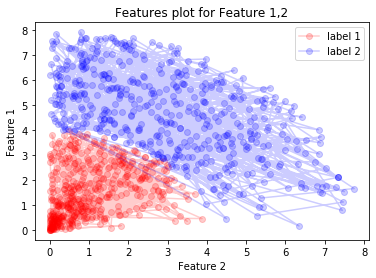

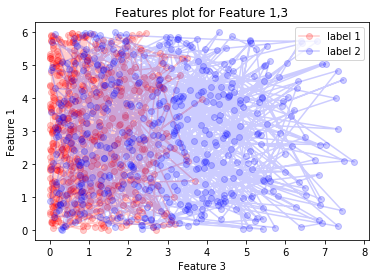

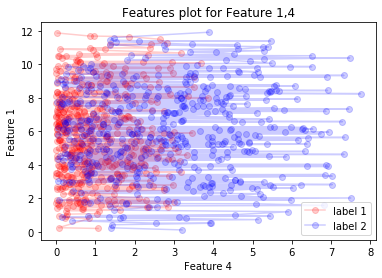

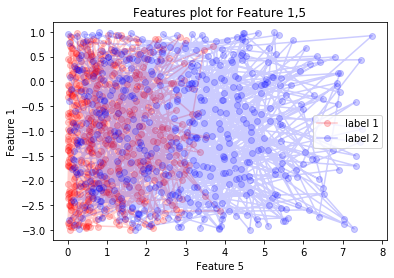

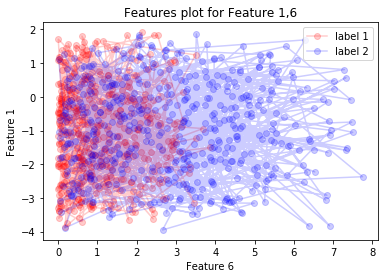

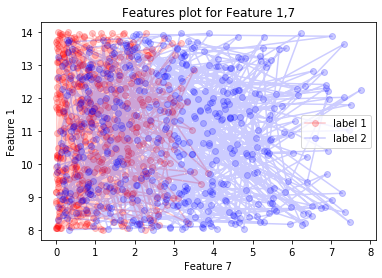

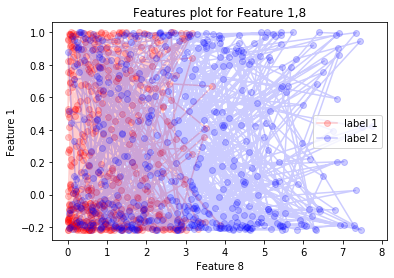

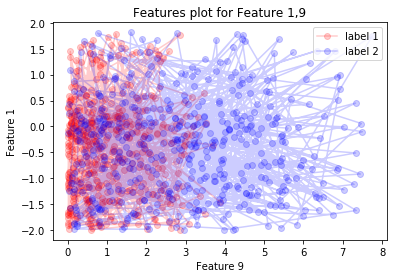

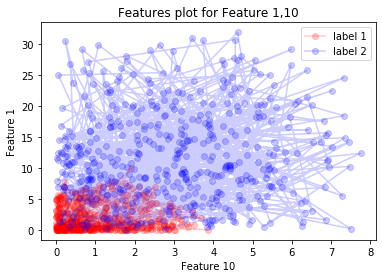

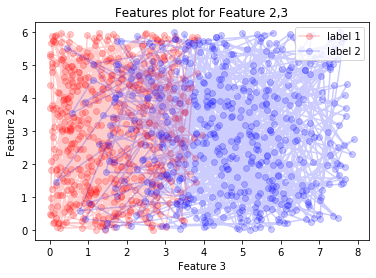

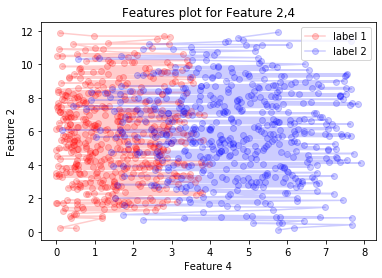

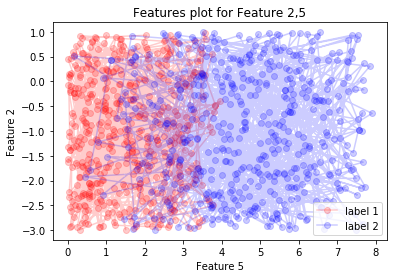

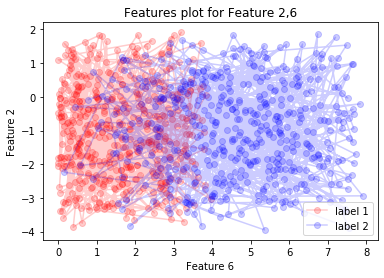

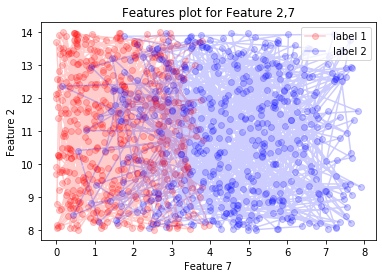

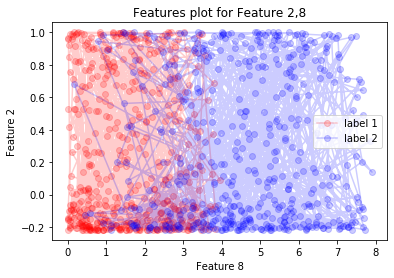

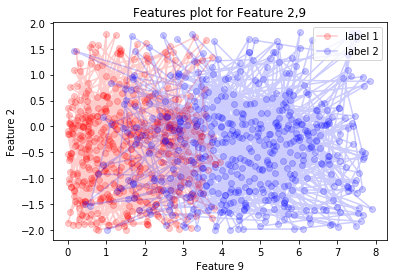

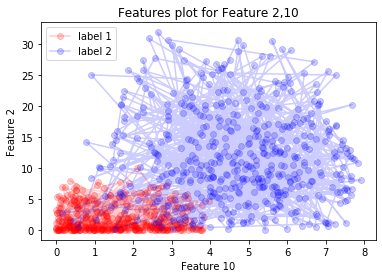

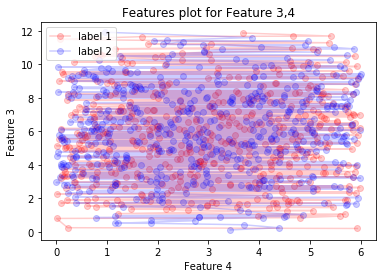

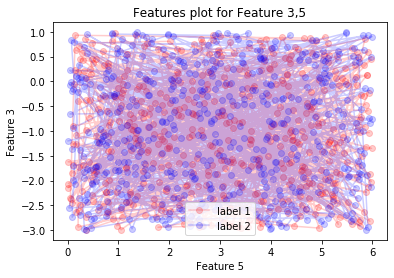

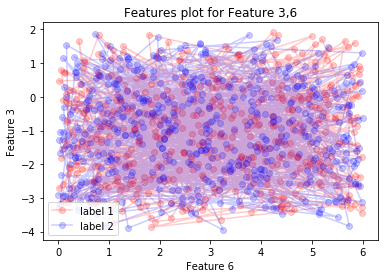

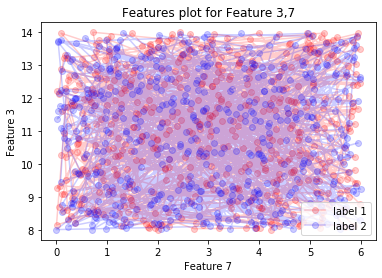

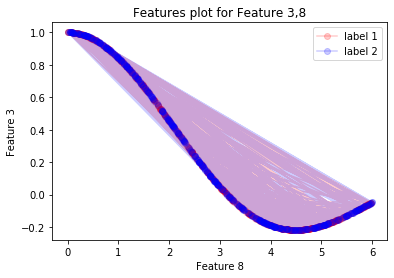

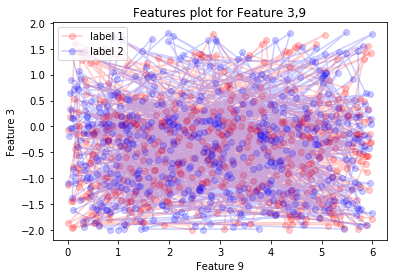

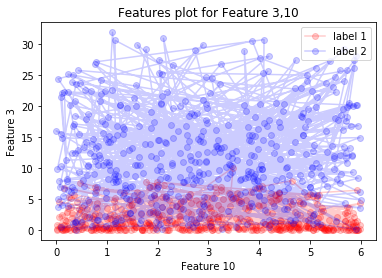

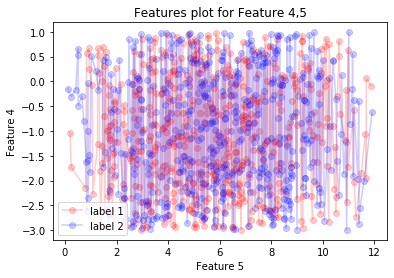

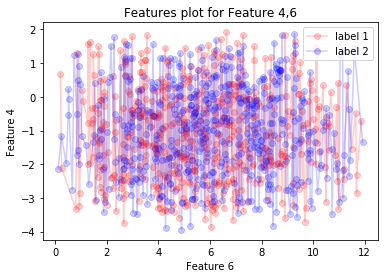

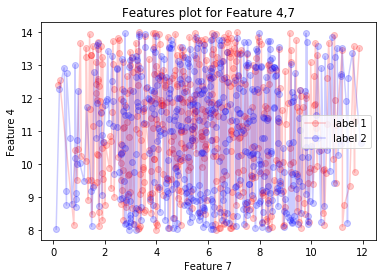

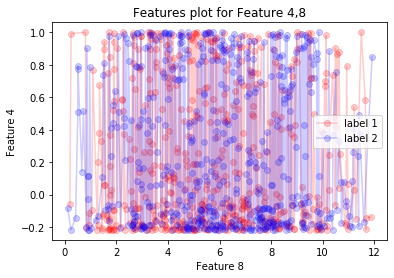

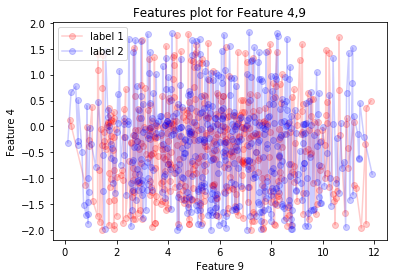

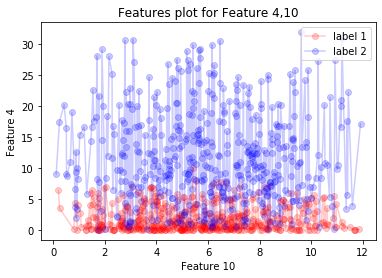

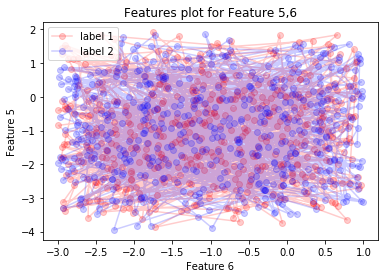

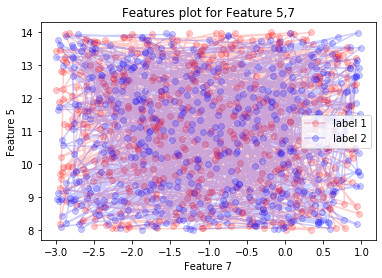

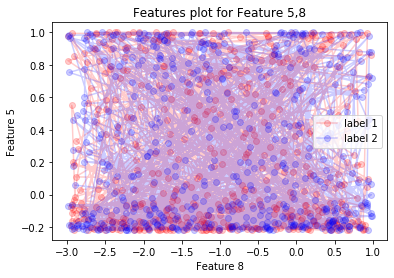

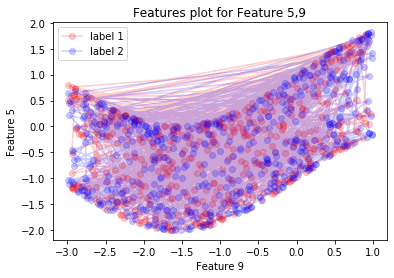

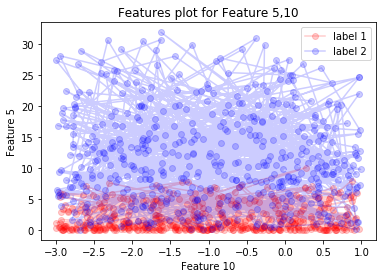

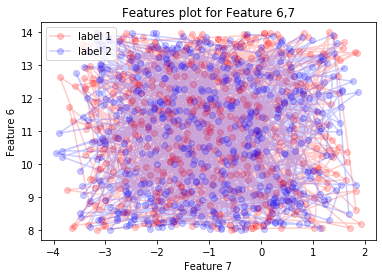

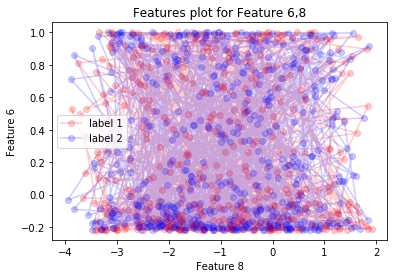

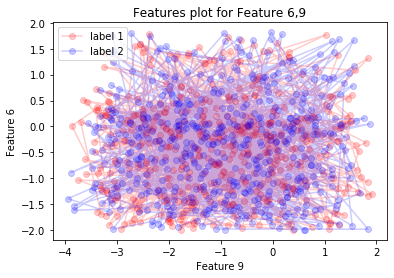

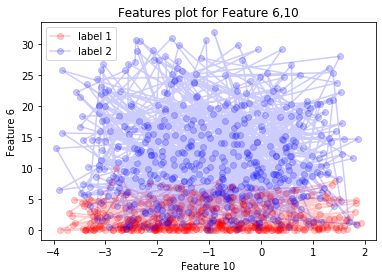

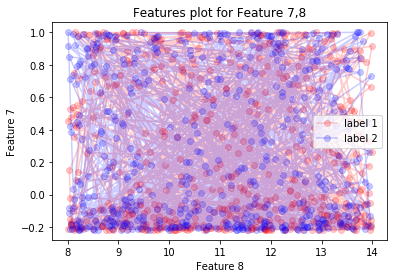

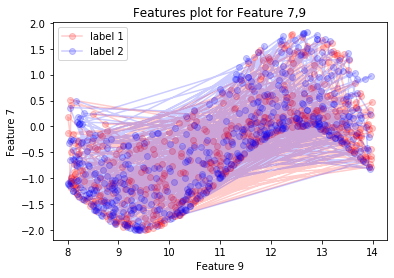

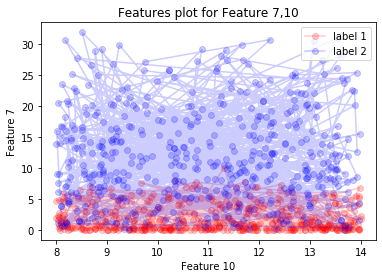

In [18]:
#Task2
#To plot all features(2 at a time) vs each other. red for lable 1 and blue for label 2.
#feature i on y axis and feature j on x axis.
for i in range(1,10):
    for j in range(i+1,11):
        plt.plot(data_matrix1[ :,i-1],data_matrix1[ : ,j-1],'r',marker='o',label='label 1',alpha=0.2)
        plt.plot(data_matrix2[ :,i-1],data_matrix2[ : ,j-1],'b',marker='o',label='label 2',alpha=0.2)

        plt.tick_params(axis='x', which='xlarge', labelsize=3)
        plt.title('Features plot for Feature '+ str(i)+','+str(j))
        plt.ylabel('Feature '+str(i))
        plt.xlabel('Feature '+str(j))
        plt.legend()
        plt.show()
        #plt.savefig('Images/Feature'+str(i)+','+str(j)+'.png')
#Task3
#Features 1 and 2 are the features which can distinguish two labels most appropiately.

TASK 3 :

As shown from all the plots , we get that feature 1 and feature 2 as represent by data.txt, are the most appropriate features to distinguish between labels.

In [19]:
# using sklearn for using PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [23]:
#accessing only features data in data_matrix. 
data_matrix = np.delete(matrix,0,1)
#Data Standardization
data_matrix= StandardScaler().fit_transform(data_matrix)

In [24]:
#getting two principal components using PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_matrix)
pca.explained_variance_ratio_
#array([0.71363823, 0.08506042])

array([0.19550175, 0.17821025])

In [25]:
#label_matrix contain the labels with respect to the data_matrix
label_matrix = matrix[:,0].reshape(999,1)
pca_matrix = np.append(principalComponents,label_matrix,axis=1)

In [26]:
#we are dividing data of PCA features based on labels for plot purpose.
pca_matrix1= pca_matrix[pca_matrix[:,2]==1]
pca_matrix1 = np.delete(pca_matrix1, 2, 1)
pca_matrix2= pca_matrix[pca_matrix[:,2]==2]
pca_matrix2 = np.delete(pca_matrix2, 2, 1)

In [34]:
#plot for the features obtained from PCA
plt.scatter(pca_matrix1[ :,0],pca_matrix1[ : ,1],c='r',marker='o',label='label 1',alpha=0.2)
plt.scatter(pca_matrix2[ :,0],pca_matrix2[ : ,1],c='b',marker='o',label='label 2',alpha=0.2)
plt.tick_params(axis='x', which='xlarge', labelsize=3)

plt.title("PCA Plot")
plt.xlabel("PC 2")
plt.ylabel("PC 1")
plt.legend()
plt.show()
#plt.savefig('Images/PCA_Plot.png')

In [33]:
#for checking the explained variance of all the possible combination of features
for i in range(0,9):
    for j in range(i+1,10):
        new_mat = data_matrix[:,[i,j]]
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(new_mat)
        print(str(i+1)+" "+str(j+1))
        print(pca.explained_variance_ratio_)

1 2
[0.60185502 0.39814498]
1 3
[0.51331434 0.48668566]
1 4
[0.53577351 0.46422649]
1 5
[0.5122996 0.4877004]
1 6
[0.51136194 0.48863806]
1 7
[0.52795251 0.47204749]
1 8
[0.5080902 0.4919098]
1 9
[0.50551827 0.49448173]
1 10
[0.70843126 0.29156874]
2 3
[0.51284582 0.48715418]
2 4
[0.51364179 0.48635821]
2 5
[0.51399512 0.48600488]
2 6
[0.50957615 0.49042385]
2 7
[0.52942058 0.47057942]
2 8
[0.51392033 0.48607967]
2 9
[0.50525977 0.49474023]
2 10
[0.74562299 0.25437701]
3 4
[0.52596273 0.47403727]
3 5
[0.5116986 0.4883014]
3 6
[0.50144882 0.49855118]
3 7
[0.51624331 0.48375669]
3 8
[0.96538812 0.03461188]
3 9
[0.50718756 0.49281244]
3 10
[0.50399196 0.49600804]
4 5
[0.51243867 0.48756133]
4 6
[0.50208561 0.49791439]
4 7
[0.51966986 0.48033014]
4 8
[0.51660687 0.48339313]
4 9
[0.51070635 0.48929365]
4 10
[0.51570476 0.48429524]
5 6
[0.52352081 0.47647919]
5 7
[0.51257143 0.48742857]
5 8
[0.51345915 0.48654085]
5 9
[0.71532175 0.28467825]
5 10
[0.50233362 0.49766638]
6 7
[0.50159157 0.498

Conclusion: 
 i) As we can see from the pca plot , that yes we are able to distinguish the labels based on the principal componenets obtained by PCA. But from the plots of all features in task 2, we get more better plot for feature 1 vs feature 2.
 ii) As we can't apply task 2 for big datasets with a large number of features. In that case PCA is of great help.
 iii) from the explianed variance obtained by using PCA for every possible combination of 2 features. We get that 
         a) highest variation ration is always obtained, with the combination of column 10 with column 1, 2, 4.(for columns 3,8 and 5,9 also).
         b) we get a good variation ratio of features 1 and 2 together.